<a href="https://colab.research.google.com/github/Rsimetti/cursoAP2020/blob/master/Semana03_RNA_x_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 3 - Redes Neurais Artificiais 

Essa atividade consiste em:
*   Criar um notebook no Google Colab;
*   Realizar a leitura dos dados com pandas;
*   Realizar a limpeza e organização dos dados para modelagem;
*   Realizar o treinamento de uma Rede Neural e o teste;
*   Realizar a análise e interpretação dos resultados obtidos;
*   Incluir as análises no notebook.

##1. Carregamento das bibliotecas utilizadas

In [1]:
# Montando o diretório do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# Importando as bilbiotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Divisão dos dados para treino e teste
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

# Transformação dos dados
from sklearn.preprocessing import MinMaxScaler

# Métricas para os modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Classificador de árvore de decisão (RF)
from sklearn.ensemble import RandomForestClassifier

# Classificador Redes Neurais (RN)
from sklearn.neural_network import MLPClassifier

# Otimização dos parâmetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Leitura dos dados

Os dados utilizados nesta sessão são os mesmos que foram análisados na [tarefa da semana anterior](https://github.com/Rsimetti/cursoAP2020/blob/master/Arvore_de_decisao_e_floresta_aleatoria.ipynb), portanto não será realizada novamente a análise exploratória ou a limpeza destes. Será realizada a leitura dos dados e iremos separar os dados em variáveis explicativas (X) e variável resposta.

In [3]:
# Leitura dos dados
da = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dados/Contraceptive Method Choice.csv")

In [4]:
# Separação em variáveis explicativas (X) e variável resposta (Y)
X = da.iloc[:,:9]
Y = da.ContraceptiveMethodUsed

## 3. Treinamento dos modelos

Para o treinamento das redes neurais utilizaremos inicialmente uma arquitetura que não demanda grande esforço computacional, posteriormente será excutado o *tuning* dos parâmetros. Utilizaremos modelos gerados via Random Forest (RF) para comparar as métricas dos modelos obtidos via Redes Neurais Artificiais (RNA). A escolha do RF é devido ao maior desempenho em relação as Árvores de Decisão da semana anterior. 
Nesta etapa os modelos gerados via RNA e RF serão comparados em diferente métodos de amostragem:
*   Holdout - 80/20 
*   Validação cruzada - k = 20

In [5]:
# Criando o classificador para RNA
classificador_rede = MLPClassifier(hidden_layer_sizes = (9,14),
                                  max_iter = 10000,
                                  learning_rate = "constant",
                                  solver='sgd',
                                  activation = "tanh", 
                                  verbose = False)

In [6]:
# Criando o classificado para RF
classificador_floresta = RandomForestClassifier(n_estimators=100)

###  Utilizando holdout

Para o método holdout utilizaremos 80% dos dados para treinamento e 20% para teste dos modelos gerados via RNA e e RF. Além disso iremos transformar as variáveis explicativas utilizando a normalização, onde

$ x^t = \frac{(x-mínimo)}{(máximo-mínimo)} $


In [7]:
# Criação dos lotes de treino e teste 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [8]:
# Criando o transformador e fazendo a transformação dos dados de treino e teste
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Para comparação entre os modelos de RNA e RF utilizaremos a matriz de confusão e as métricas geradas com os dados de teste.

In [9]:
# Treinando a rede 
classificador_rede.fit(X_train, Y_train)

# Fazendo a predição no lote de teste
predictions_rn = classificador_rede.predict(X_test)

In [10]:
# Obtendo a matriz de confusão e as métricas do modelo para os dados de teste
print("====================  Matriz de confusão resultante da rede neural ==================== ")
print(confusion_matrix(Y_test,predictions_rn))
print("====================  Métricas da rede neural ==================== ")
print(classification_report(Y_test,predictions_rn))

====================  Matriz de confusão resultante da rede neural ==================== 
[[92 18 29]
 [17 19 28]
 [35 17 40]]
====================  Métricas da rede neural ==================== 
              precision    recall  f1-score   support

           1       0.64      0.66      0.65       139
           2       0.35      0.30      0.32        64
           3       0.41      0.43      0.42        92

    accuracy                           0.51       295
   macro avg       0.47      0.46      0.47       295
weighted avg       0.51      0.51      0.51       295



In [11]:
# Treinamento da floresta
classificador_floresta.fit(X_train,Y_train)

# Fazendo a predição no lote de teste
predictions_rf = classificador_floresta.predict(X_test)

In [12]:
# Obtendo a matriz de confusão e as métricas do modelo para os dados de teste
print("====================  Matriz de confusão resultante da floresta aleatória ==================== ")
print(confusion_matrix(Y_test,predictions_rf))
print("====================  Métricas da floresta aleatória ==================== ")
print(classification_report(Y_test,predictions_rf))

====================  Matriz de confusão resultante da floresta aleatória ==================== 
[[95  9 35]
 [23 21 20]
 [27 24 41]]
====================  Métricas da floresta aleatória ==================== 
              precision    recall  f1-score   support

           1       0.66      0.68      0.67       139
           2       0.39      0.33      0.36        64
           3       0.43      0.45      0.44        92

    accuracy                           0.53       295
   macro avg       0.49      0.49      0.49       295
weighted avg       0.53      0.53      0.53       295



Quando utilizado o método de amostragem *holdout* foi possível observar que:

*   RNA e RF apresentaram valores de acurácia relativamente baixos, sendo de 0,51 e 0,53; para RNA e RF, respectivamente. 
*   Aparentemente existe um efeito do números de observações das classes na precissão dos modelos, tanto RNA quanto RF apresentaram maiores valores para as classes com maior número de observações e foram reduzindo com a redução do número do observações. 
*   Somente a classe 1 apresentou maior número de classificações corretas do que classificações incorretas.



### Utilizando validação cruzada

Na validação cruzada utilizaremos como métrica para avaliação dos modelos a acurácia. Destaca-se que utilizaremos o lote de treino previamente utilizado no método holdout para que seja mantido o mesmo número de observações.

In [13]:
# Treinando a rede 
scores_rn = cross_val_score(classificador_rede,
                            X_train,
                            Y_train,
                            cv = 20)

In [14]:
# Treinando a floresta
scores_rf = cross_val_score(classificador_floresta,
                            X_train,
                            Y_train,
                            cv = 20)

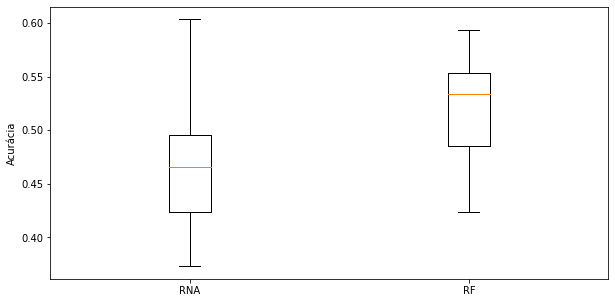

Para RNA - Média = 0.472 Desvio = 0.053
Para RF - Média = 0.52 Desvio = 0.051


In [15]:
# Plotar o gráfico dos resultados de acurácia
plt.rcParams["figure.figsize"] = (10,5)
plt.boxplot([scores_rn, scores_rf], 
            labels = ["RNA", "RF"])
plt.ylabel("Acurácia")
plt.show()
# Escrever as estatísticas descritivas das métricas
print("Para RNA - Média =", round(scores_rn.mean(),3), "Desvio =",round(scores_rn.std(),3))
print("Para RF - Média =", round(scores_rf.mean(),3), "Desvio =",round(scores_rf.std(),3))

Para o método de amostragem de validação cruzada com k = 20 podemos observar que:
* O desemprenho médio para RF foi superior ao desempenho médio para RNA.
* Em algumas situações a RNA pode apresentar melhor desempenho que RF, portanto o uso de validação cruzada é importante para que não ocorram interpretações equivocadas. 




## Otimização dos parâmetros para RNA

Na otimização dos parâmetros serão utilizados os métodos RandomSearch e GridSearch. Assim como anteriormente, utilizaremos apenas 80% dos dados (Lotes X_train e Y_train) para que os modellos sejam gerados com o mesmo número de observações que os anteriores.

In [16]:
# Definindo os parâmetros para seleção
param_grid = [
              {
                  'hidden_layer_sizes': [(10),
                                         (15),
                                         (20),
                                         (10,20),
                                         (20,40)],
                  'activation': ['identity',
                                 'tanh', 
                                 'relu'],
                  'solver': ['sgd', 
                             'adam'],
                  'max_iter': [1000,
                               2000]
              }
]

In [17]:
# Criando a RNA para otimização com Random Search
rna1 = RandomizedSearchCV(MLPClassifier(),
                         param_grid,
                         cv = 20,
                         scoring = 'accuracy')

In [18]:
#Realizando o treino
rna1.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rando...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='deprecated

In [25]:
# Resutlados para Random Search
print(rna1.best_params_)
print(round(rna1.best_score_,7))

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': (10, 20), 'activation': 'tanh'}
0.5612361


In [20]:
# Criando a RNA para otimização com Grid Search
rna2 = GridSearchCV(MLPClassifier(),
                   param_grid,
                   cv = 20,
                   scoring='accuracy')

In [21]:
rna2.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=20, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': 

In [26]:
# Resutlados para Grid Search
print(rna2.best_params_)
print(round(rna2.best_score_,7))

{'activation': 'tanh', 'hidden_layer_sizes': (10, 20), 'max_iter': 1000, 'solver': 'adam'}
0.56128


Com base nos resultados obtidos para Random Search e Grid Search, a combinação de parâmetros que otimiza a acurácia dos dados é:
* Solver = Adam
* Máximo de interações= 1000
* Camadas ocultas = 2 camadas com 10 e 20 neurônios
* Função de ativação = tangente hiperbólica.

Para ambos os casos a configuração da rede foi a mesma, além da acurácia ser aproximadamente a mesma em anbos os casos, 0,5612361 para random search e 0,56128 para grid search. Dessa maneira, foi realizado o teste das RNA.



In [31]:
# Selecionando a melhor RNA para cada método
rna1_ot = rna1.best_estimator_
rna2_ot = rna2.best_estimator_

In [32]:
# Realizando a predição no lote de teste com as RNA otimizadas
classificao_1 = rna1_ot.predict(X_test)
classificao_2 = rna2_ot.predict(X_test)

In [33]:
print("=======  Matriz de confusão resultante da RNA selecionada via Random Search ======= ")
print(confusion_matrix(Y_test,classificao_1))
print("====================  Métricas da RNA selecionada via Random Search ==================== ")
print(classification_report(Y_test,classificao_1))

=======  Matriz de confusão resultante da RNA selecionada via Random Search ======= 
[[97 13 29]
 [21 19 24]
 [22 17 53]]
====================  Métricas da RNA selecionada via Random Search ==================== 
              precision    recall  f1-score   support

           1       0.69      0.70      0.70       139
           2       0.39      0.30      0.34        64
           3       0.50      0.58      0.54        92

    accuracy                           0.57       295
   macro avg       0.53      0.52      0.52       295
weighted avg       0.57      0.57      0.57       295



In [34]:
print("=======  Matriz de confusão resultante da RNA selecionada via Grid Search ======= ")
print(confusion_matrix(Y_test,classificao_2))
print("====================  Métricas da RNA selecionada via Random Grid ==================== ")
print(classification_report(Y_test,classificao_2))

=======  Matriz de confusão resultante da RNA selecionada via Grid Search ======= 
[[94 15 30]
 [19 19 26]
 [21 17 54]]
====================  Métricas da RNA selecionada via Random Grid ==================== 
              precision    recall  f1-score   support

           1       0.70      0.68      0.69       139
           2       0.37      0.30      0.33        64
           3       0.49      0.59      0.53        92

    accuracy                           0.57       295
   macro avg       0.52      0.52      0.52       295
weighted avg       0.56      0.57      0.56       295



Em relação aos métodos de otimização dos parâmetros, podemos observar que:
*   Os valores de acurácia foram aproximados novamente (0,57 em ambos os casos)
*   Orreram diferenças entre a precisão e o recall entre os métodos testados, porem em pequena magnitude.



## Considerações finais


Em relação ao uso de RNA para classificação no banco de dados utilizado, podemos concluir:
*   Os resultados apresentados pela RNA são inferiores aos apresentados para RF quando não há otimização.
*   Para os parâmetros avaliados, os dois métodos de otimização são semelhantes.
*   Quando otimizada a RNA apresentou resultados superiores ao RF sem otimização. 
*   O número de observações desbalanceado entre as classes parece afetar a classificação por RNA assim como constatado anteriormente para RF.
*   O método de amostragem de validação cruzada apresenta melhor desempenho em relação ao método *holdout*. 

Como sugestões para avançar no desenvolvimento de um melhor classificador para esses dados:
*   Testar mais combinações de parâmetros na otimização.
*   Testar difentes valor de K na validação cruzada.

